## Machine Learning Project: Image Augmentation and Transfer Learning

## Cifar-10 dataset

We will be using the CIFAR-10 dataset for the entirety of the assignment. The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.The imafes were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.<br><br>
The 10 different classes in the dataset are as follows:

<table class="tg">
  <tr>
    <th class="tg-0lax">Number</th>
    <th class="tg-0lax">Class Label</th>
  </tr>
  <tr>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">Airplane</td>
  </tr>
  <tr>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">Automobile</td>
  </tr>
  <tr>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax">Bird</td>
  </tr>
  <tr>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">Cat</td>
  </tr>
  <tr>
    <td class="tg-0lax">5</td>
    <td class="tg-0lax">Deer</td>
  </tr>
  <tr>
    <td class="tg-0lax">6</td>
    <td class="tg-0lax">Dog</td>
  </tr>
  <tr>
    <td class="tg-0lax">7</td>
    <td class="tg-0lax">Frog</td>
  </tr>
  <tr>
    <td class="tg-0lax">8</td>
    <td class="tg-0lax">Horse</td>
  </tr>
  <tr>
    <td class="tg-0lax">9</td>
    <td class="tg-0lax">Ship</td>
  </tr>
  <tr>
    <td class="tg-0lax">10</td>
    <td class="tg-0lax">Truck</td>
  </tr>
</table>

In [1]:
#install required libraries
import pandas as pd
import numpy as np

#data visualization packages
import matplotlib.pyplot as plt

#keras packages
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout

#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

#other packages
import time as time
from IPython.display import display, Markdown
from IPython.display import display
from time import sleep
from IPython.display import Markdown as md

from keras.datasets import cifar10

Using TensorFlow backend.


## CNN model without Image Augmentation and Transfer Learning for the benchmark results

### Data Preparation

In [2]:
#read mnist dataset
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#split the dataset into training and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

#feature scaling
X_train_scaled = X_train / 255.0
X_val_scaled   = X_val / 255.0
X_test_scaled  = X_test / 255.0

(40000, 32, 32, 3) (40000, 1) (10000, 32, 32, 3) (10000, 1) (10000, 32, 32, 3) (10000, 1)


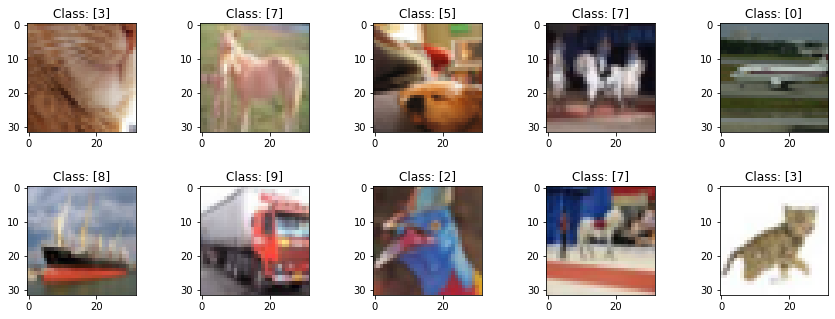

In [3]:
#display first 10 images of the dataset
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          #create subplot
ax = axes.ravel()

#loop through 10 images
for i in range(10):
    ax[i].imshow(X_train[i])                                       #print image
    ax[i].title.set_text('Class: ' + str(y_train[i]))              #print class
plt.subplots_adjust(hspace=0.5)                                    #increase horizontal space
plt.show()                                                         #display image

## Convolution Neural Network Model

<img src="CNN layer1.png" alt="drawing" width="600"/>
<br><br>
<p style="font-size:16px;font-family:Arial">We have implemented the sequential model as our neural network model. The sequential model is a linear stack of layers, we have added layers to the network by using the .add() method. <br><br>
kernel_initializer defines which statistical distribution or function to use for initialising the weights. In case of statistical distribution, the library will generate numbers from that statistical distribution and use as starting weights. In our code above we have used uniform distribution to initialize the weights. <br><br>
In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input. The rectified linear activation (Relu) function is a piecewise linear function that will output the input directly if is positive, otherwise, it will output zero. The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.<br><br> The output of the softmax function is equivalent to a categorical probability distribution, it tells you the probability that any of the classes are true. The class with the highest probability is chosen as the output.<br><br><b>Optimization</b> is the task of searching for parameters that minimize our loss function. We open use categorical crossentropy  when it is a multiclass classification task. <b>Cross entropy</b> is a loss function, used to measure the dissimilarity between the distribution of observed class labels and the predicted probabilities of class membership. In our model we have impemeneted <b>sparse categorical crossentropy</b> since we have intergers numbered from 0-9 as our class labels.<br><br> We have implemeneted <b>Adam</b> which is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based on training data.</p>

In [4]:
def model_cnn(count=1):
    '''Convolution Neural Network'''
    
    #Model Initializing, Compiling and Fitting
    classifier = Sequential()
    
    #convolution layer
    classifier.add(Convolution2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
    
    #max-pooling layer
    classifier.add(MaxPooling2D(2,2))
    
    #in case of multiple convolution layer
    if count>1:
        for i in range(count-1):
            classifier.add(Convolution2D(32, (3,3), activation='relu'))
            classifier.add(MaxPooling2D(2,2))
            
    #flatten layer
    classifier.add(Flatten())
    
    #fully connected layer
    #dense (hidden) layer
    classifier.add(Dense(units = 256, kernel_initializer='uniform', activation='relu'))
    
    #dense (hidden) layer
    classifier.add(Dense(units = 512, kernel_initializer='uniform', activation='relu'))
    
    #output layer
    classifier.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
    
    #compile the model
    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    #model summary
    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
    classifier.summary()

    #include timing details
    dh = display('',display_id=True)
    dh.update(md("<br>Training is in progress....."))
    t1 = time.time()
    
    #fit the model with training dataset
    classifier_fit = classifier.fit(X_train_scaled, 
                                    y_train, 
                                    epochs=100, 
                                    batch_size=32, 
                                    validation_data=(X_val, y_val), 
                                    verbose=0)
    tt = time.time()-t1
    avg_per_epoch_cnn = round(tt/(classifier_fit.epoch[-1]+1),3)
    dh.update(md("<br>Training is completed! <br><br>Total training time: **{} seconds** <br>Average Training time per epoch: **{} seconds**".format(round(tt,3), avg_per_epoch_cnn)))
    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

    #plot the graph
    #accuracy graph
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
    ax = axes.ravel()
    ax[0].plot(range(0,classifier_fit.params['epochs']), [acc * 100 for acc in classifier_fit.history['accuracy']], label='Training Accuracy', color='b')
    ax[0].plot(range(0,classifier_fit.params['epochs']), [acc * 100 for acc in classifier_fit.history['val_accuracy']], label='Validation Accuracy', color='r')
    ax[0].set_title('Accuracy vs. epoch', fontsize=15)
    ax[0].set_ylabel('Accuracy', fontsize=15)
    ax[0].set_xlabel('epoch', fontsize=15)
    ax[0].legend()

    #loss graph
    ax[1].plot(range(0,classifier_fit.params['epochs']), classifier_fit.history['loss'], label='Training Loss', color='b')
    ax[1].plot(range(0,classifier_fit.params['epochs']), classifier_fit.history['val_loss'], label='Validation Loss', color='r')
    ax[1].set_title('Loss vs. epoch', fontsize=15)
    ax[1].set_ylabel('Loss', fontsize=15)
    ax[1].set_xlabel('epoch', fontsize=15)
    ax[1].legend()

    #display the graph
    plt.show()

    #Evaluate the model
    dh = display('',display_id=True)
    dh.update(md("<br>Model evaluation is in progress..."))
    t2 = time.time()
    
    #model evaluation
    test_loss = classifier.evaluate(X_test_scaled, y_test, verbose=0)
    et = time.time()-t2
    dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))
    display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

    #calculate the model evaluation parameters
    f1  = f1_score(y_test, classifier.predict_classes(X_test_scaled), average='micro')
    roc = roc_auc_score(y_test, classifier.predict_proba(X_test_scaled) , multi_class='ovr')

    #create model evaluation dtaaframe
    stats = pd.DataFrame({'Test accuracy' : round(test_loss[1]*100,3),
                          'F1 score'      : round(f1,3),
                          'ROC AUC score' : round(roc,3),
                          'Total Loss'    : round(test_loss[0],3)}, index=[0])
    
    #print the dataframe
    display(stats)
    
    #return the classifier and model evaluation details
    return classifier_fit, stats

### Number of CNN layer = 2

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               295168    
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

<br>Training is completed! <br><br>Total training time: **1515.177 seconds** <br>Average Training time per epoch: **15.152 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

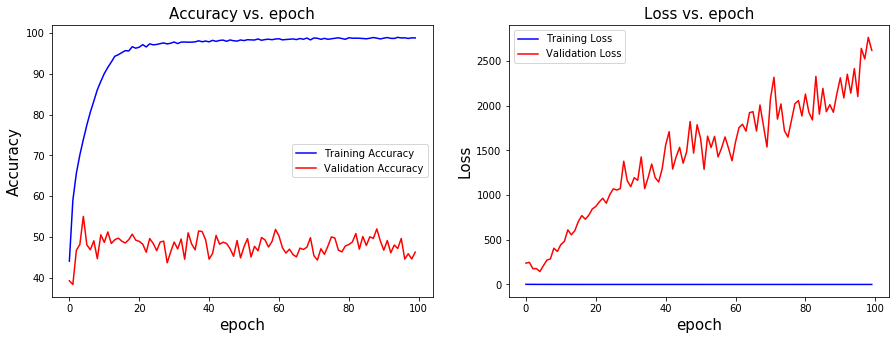

<br>Model evaluation is completed! Total evaluation time: **1.903 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,65.08,0.651,0.927,5.479


In [5]:
#run the CNN model with 1 layer
classifier_1cnn, stats_1cnn = model_cnn(2)

## Key Inferences

<p style="font-size:16px;font-family:Arial">1) The training accuracy is more than 96% and the validation accuracy is nearby 50%.<br><br>
    2) There is a clear indication of the overfitting happening in the model as we can see the big gap between the two curves.<br><br>
    3) Since the training and validation loss accuracy diverged consistently and the difference increases as we increase the number of epochs, it would be advisable to limit the number of epochs for this model.<br><br>
    4) We can further increase the performance of the model by incorporating below points:<br><br>
        &#8195;1) We can increase the training size as the model is not generalizing well with the given data size.<br><br>
        &#8195;2) We can add regularization (dropout) within the model.<br><br>
       &#8195;3) Use Image Augmentation<br><br>
       &#8195;4) Add Transfer Learning model architecture<br><br>We will demonstrate a few of the methods discussed above in the following analysis.


# CNN Model with Image Augmentation
<br>

<p style="font-size:16px;font-family:Arial">1.When humans see an image they see a 2-D represenation of a 3-D object. When our computer imputs an image, all it comprehends is an array of numbers. These numeric values are the values of the pixel and cumulatively make up the image.<br><br>
2.If we manipulate the image by altering the values of the pixels slightly, for us humans that change will be miniscule and we can still visualize the original image from the altered image, for the computer however, the array containing the pixel values of the altered image will be different than the array of the original image and the new altered image will be considered as a different image by the computer. <br><br>
3.We make sure to assign the new altered image the same class label as the original label to ensure that tasks such as classification are perfomed correctly.
4.This concept of artifically increasing the size of the training dataset by slightly altering the already existing training dataset is know is <b>Image Augmentation</b>.<br><br>
5.Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.<br><br>
6.The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the <b>ImageDataGenerator class</b>.<br><br>
7.So, to get more data, we just need to make minor alterations to our existing dataset. Minor changes such as flips or translations or rotations. Our neural network would think these are distinct images.</p>

![alt text](aug1.jpg "Title")

<p style="font-size:16px;font-family:Arial">We have performed augmentation on our dataset by usiing the ImageDataGenerator Class. ImageDataGenerator generates batches of image data with real-time data augmentation. The paramaters we have used are explained below in detail. <br><br>1. <b>Zoom_range:</b> Zoom_range enables us to randomly zoom in the images. The value of zoom_range ranges from 0 to 1 and the itensity of the zoom increases as we increase from 0 to 1.<br><br>2. <b>height_shift_range:</b> In this method, we provide a value between 0 and 1 which specifies the maximum amount of vertical shift the image will undergo.<br><br>3. <b>rotation_range:</b> The values provided to this parameyter in degree provides the range for the random roatations for our dataset.<br><br>4. <b>shear_range:</b> The value passed to the shear_range parameter dictates the itensity of the shear transformation that is applied to the image.<br><br>5. <b>width_shift_range:</b> Here we pass the fraction of the total width which acts as the range for the random horizontal shift of the images.<br><br>6. <b>horizontal_flip:</b> The boolean parameter decides whether or not randomly chosen images in the dataset will be flipped horizontally. The value True passed means that some images that are randomly selected will be horizontally flipped.<br><br>7.<b> fill_mode:</b> Fill Mode has 4 values that we can choose from, namely, 'Constant','nearest','reflect' and 'wrap'. Fill mode is used to fill the newly created pixels that get created when we shift our images horizontally or vertically. </p>





In [6]:
#Image Augmentation library
from keras.preprocessing.image import ImageDataGenerator

#training dataset
train_datagen = ImageDataGenerator(zoom_range=0.25,           #Range for random zoom
                                   height_shift_range=0.25,   #fraction of total height
                                   rotation_range=45,         #Degree range for random rotations.
                                   shear_range=0.25,          #(Shear angle in counter-clockwise direction in degrees
                                   width_shift_range=0.3,     #fraction of total width
                                   horizontal_flip=True,      #Randomly flip inputs horizontally
                                   fill_mode='nearest')       #Points outside the boundaries of the input are filled

#validation dataset
val_datagen = ImageDataGenerator()

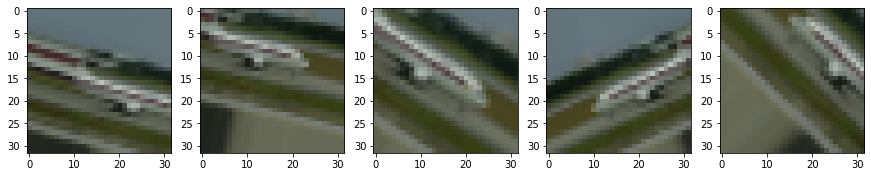

In [7]:
#image augmentation samples
#pick any random image
img_id = 4
number_of_images = 5
image = train_datagen.flow(X_train_scaled[img_id:img_id+1], y_train[img_id:img_id+1], batch_size=1)

#pick 5 augmentation image
cat = [next(image) for i in range(0,number_of_images)]
fig, ax = plt.subplots(1,number_of_images, figsize=(15, 7.5))
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

In [8]:
#Model Initializing, Compiling and Fitting
classifier_ia = Sequential()

#convolution layer
classifier_ia.add(Convolution2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))

#max-pooling layer
classifier_ia.add(MaxPooling2D(2,2))

#flatten layer
classifier_ia.add(Flatten())

#fully connected layer
#dense (hidden) layer
classifier_ia.add(Dense(units = 256, kernel_initializer='uniform', activation='relu'))

#dense (hidden) layer
classifier_ia.add(Dense(units = 512, kernel_initializer='uniform', activation='relu'))

#output layer
classifier_ia.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))

#compile the model
classifier_ia.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model summary
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
classifier_ia.summary()

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1843456   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 1,981,066
Trainable params: 1,981,066
Non-trainable params: 0
____________________________________________

In [9]:
#training dataset image augmentation
train_generator = train_datagen.flow(X_train_scaled,
                                     y_train, 
                                     batch_size=40)
#validation dataset image augmentation
val_generator = val_datagen.flow(X_val_scaled,
                                 y_val, 
                                 batch_size=20)
#image size
input_shape = (32, 32, 3)

#include timing information
dh = display('',display_id=True)
dh.update(md("<br>Training is in progress....."))
t1 = time.time()

#model fitting
history_ia = classifier_ia.fit_generator(train_generator, 
                                   validation_data=val_generator, 
                                   epochs=100,
                                   steps_per_epoch=1000, 
                                   validation_steps=500, 
                                   verbose=0)   

tt = time.time()-t1
avg_per_epoch_ia = round(tt/(history_ia.epoch[-1]+1),3)
dh.update(md("<br>Training is completed! <br><br>Total training time: **{} seconds** <br>Average Training time per epoch: **{} seconds**".format(round(tt,3), avg_per_epoch_ia)))

<br>Training is completed! <br><br>Total training time: **2520.37 seconds** <br>Average Training time per epoch: **25.204 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

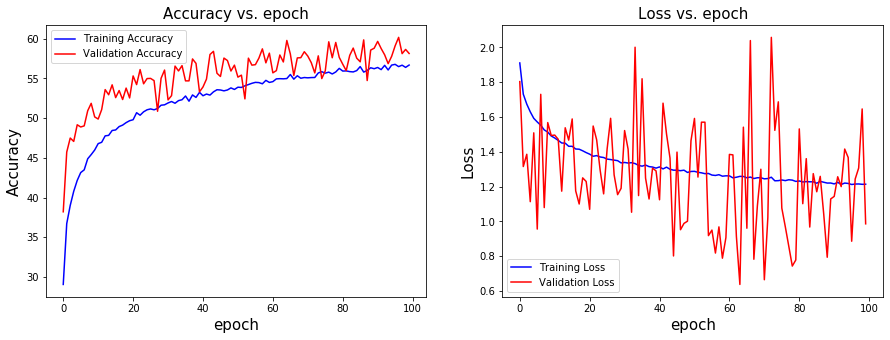

In [10]:
#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

#accuracy graph
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()
ax[0].plot(range(0,history_ia.params['epochs']), [acc * 100 for acc in history_ia.history['accuracy']], label='Training Accuracy', color='b')            #graph plotting
ax[0].plot(range(0,history_ia.params['epochs']), [acc * 100 for acc in history_ia.history['val_accuracy']], label='Validation Accuracy', color='r')      #graph plotting
ax[0].set_title('Accuracy vs. epoch', fontsize=15)     #title
ax[0].set_ylabel('Accuracy', fontsize=15)              #y-label
ax[0].set_xlabel('epoch', fontsize=15)                 #x-label
ax[0].legend()                                         #legend

#loss graph
ax[1].plot(range(0,history_ia.params['epochs']), history_ia.history['loss'], label='Training Loss', color='b')
ax[1].plot(range(0,history_ia.params['epochs']), history_ia.history['val_loss'], label='Validation Loss', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

## Key Inferences

<p style="font-size:16px;font-family:Arial">1) We have successfully mitigated the problem of overfitting by introducing the Image Augmentation method which helps the model in generalizing the features well.<br><br>
2) The validation accuracy increased by approx. 6% than our previous model.<br><br>
3) The trend in the graph shows that, increasing then number of epochs results in an increase in the accuracy of the model.<br><br></p>


In [11]:
#Evaluate the model
dh = display('',display_id=True)
dh.update(md("<br>Model evaluation is in progress..."))
t2 = time.time()

#model evaluation
test_loss = classifier_ia.evaluate(X_test_scaled, y_test, verbose=0)
et = time.time()-t2
dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

#calculate the model evaluation parameters
f1  = f1_score(y_test, classifier_ia.predict_classes(X_test_scaled), average='micro')
roc = roc_auc_score(y_test, classifier_ia.predict_proba(X_test_scaled) , multi_class='ovr')

#create model evaluation dtaaframe
stats_ia = pd.DataFrame({'Test accuracy' : round(test_loss[1]*100,3),
                      'F1 score'      : round(f1,3),
                      'ROC AUC score' : round(roc,3),
                      'Total Loss'    : round(test_loss[0],3)}, index=[0])

#print the dataframe
display(stats_ia)

<br>Model evaluation is completed! Total evaluation time: **2.059 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,58.36,0.584,0.925,1.234


# Transfer Learning

<p style="font-size:16px;font-family:Arial">When working on a problem specific to our domain, often the amount of data needed to build models of this size is impossible to find. However models trained on one task capture relations in the data type and can easily be reused for different problems in the same domain. This technique is referred to as <b>Transfer Learning</b>.<br><br>
With transfer learning, we can take a pretrained model, which was trained on a large readily available dataset (trained on a completely different task, with the same input but different output). Then try to find layers which output reusable features. We use the output of that layer as input features to train a much smaller network that requires a smaller number of parameters. This smaller network only needs to learn the relations for your specific problem having already learnt about patterns in the data from the pretrained model.<br><br>
While deciding whether or not to perform transfer learning, we try to figure out and map the commonalities in the knowledge of the source and target task. The knowledge that can be transferred from the source task to the target task will play an important role in deciding the efficieny and effectiveness of the model and in turn will boost the performance on the target task. It is very important that the source and target task be of the same domain otherwise the performance will degrade. Such a scenario is often called as Negative Transfer because of the negative impact of the transfer learning model on the performance of the target task. <br><br>
The figure below provides a representation of the concept behind Transfer Learning.</p>

![alt text](tf.jpg "")
<center>Qiang Yang, Sinno Jialin Pan, “A Survey on Transfer Learning”, IEEE Transactions on Knowledge and Data Engineering, vol. 22, no. , pp. 1345–1359, October 2010, doi:10.1109/TKDE.2009.191</center>
<p style="font-size:16px;font-family:Arial">We have implemented Transfer Learning in our project by implementing two pre-trained models - VGG16 and MobileNet. A detailed model achitecture and under-the-hood working of the pre-trained models is given below.</p>

<H2>VGG-16</H2><br>
<p style="font-size:16px;font-family:Arial">VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. It's trained on the ImageNet dataset which consists of more than 14 million images and comprises of more than 1000 classes.<br><br>

The model architecture of VGG-16 is shown below.<br>
![alt text](vgg.jpg "")
<center>Image Courtesy : <a href="https://neurohive.io/en/popular-networks/vgg16/">  VGG16 – Convolutional Network for Classification and Detection</a></center>
<br>

<p style="font-size:16px;font-family:Arial">Although there are 21 layers in the model, the model derives it name from the fact that there are 16 weight layers. The various layers encompassed in the model are Convolutional layers, Max Pooling layers, Activation layers and Fully Connected layers.



## Model 1: Feature Extraction 

In [12]:
#import required libraries
from keras.applications import vgg16
from keras.models import Model
import keras

In [13]:
#image size of CIFAR-10 dataset
input_shape = (32, 32, 3)

#import model from Keras
TL1 = vgg16.VGG16(include_top=False,             #include_top: whether to include the 3 fully-connected layers at the top of the network.
                  weights='imagenet',            #weights: one of None (random initialization) or 'imagenet' (pre-training on ImageNet).
                  input_shape=input_shape)       #input_shape: optional shape tuple, only to be specified if include_top is False

<p style="font-size:16px;font-family:Arial"> We begin transfer learning process by removing the output classifier layer which has softmax implemented over 1000 units for the 1000 classes in the imagenet dataset used by VGG16 model to make the model consistent with our problem statement.

In [14]:
#remove the classifier layer from the model
output = TL1.layers[-1].output
output = keras.layers.Flatten()(output)
TL1_model = Model(TL1.input, output)

<p style="font-size:16px;font-family:Arial"> <b>We then proceed by freezing the layers of the VGG16 model, since we would like to take advantage of the generic image features that the VGG16 model has already learned and utilize the knowledge that the model has already learned to our benefit. By freezing the layers we prevent the weights of the layers of the pretrained model from being updated.<\b>

In [15]:
#freeze all the layers of the model
TL1_model.trainable = False
for layer in TL1_model.layers:
    layer.trainable = False

In [16]:
#details of model with trainable flag set to True/False
TL1_details = pd.DataFrame([(layer, layer.name, layer.trainable) for layer in TL1_model.layers], columns=['Layer Type', 'Layer Name', 'Trainable']) 

#display model details
TL1_details

,Layer Type,Layer Name,Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,False


<p style="font-size:16px;font-family:Arial"> <b> We now add fully connected classifier layers on top of the pretrained model to learn the features that are specific to our dataser. Since our dataset consists of 10 classes, our output layer consists of 10 units with the softmax activation function to give us the probability of each class with  respect to every input. </b>

In [18]:
from keras.layers import InputLayer

#Model Initializing, Compiling and Fitting
classifier_tl1 = Sequential()

#fully connected layer
#input layer
classifier_tl1.add(InputLayer(input_shape=(TL1_model.output_shape[1],)))

#dense (hidden) layer
classifier_tl1.add(Dense(units = 256, kernel_initializer='uniform', activation='relu', input_dim=TL1_model.output_shape[1]))

#dense (hidden) layer
classifier_tl1.add(Dense(units = 512, kernel_initializer='uniform', activation='relu'))

#output layer
classifier_tl1.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))

#compile the model
classifier_tl1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model summary
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
classifier_tl1.summary()

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 268,042
Trainable params: 268,042
Non-trainable params: 0
_________________________________________________________________


<p style="font-size:16px;font-family:Arial"> <b> We then extract the features, from the pre-trained layers that are frozen and use these extracted features to train the classifier layers that we've added on our model. We can visualize it by considering that the output from the layer before the flatten operation of the pretrained model now becomes the input to the new layers added by us on top of the pretrained model.<\b>

In [19]:
#function to extract features from the images
def model_image(model, image):
    image_feature = model.predict(image, verbose=0)
    return image_feature

#training dataset feature extraction from the pre-trained layers
X_train_features = model_image(TL1_model, X_train_scaled)

#validation dataset feature extraction from the pre-trained layers
X_val_features   = model_image(TL1_model, X_val_scaled)

#print dataset shapes
print('Training Image shape:',      X_train_features.shape, 
      '\tValidation Image shape:', X_val_features.shape)

Training Image shape: (40000, 512) 	Validation Image shape: (10000, 512)


In [20]:
#include timing information
dh = display('',display_id=True)
dh.update(md("<br>Training is in progress....."))
t1 = time.time()

#model fitting
history_tl1 = classifier_tl1.fit(x=X_train_features, 
                                 y=y_train,
                                 validation_data=(X_val_features, y_val),
                                 batch_size=30,
                                 epochs=100,
                                 verbose=0)

tt = time.time()-t1
avg_per_epoch_tl1 = round(tt/(history_tl1.epoch[-1]+1),3)
dh.update(md("<br>Training is completed! <br><br>Total training time: **{} seconds** <br>Average Training time per epoch: **{} seconds**".format(round(tt,3), avg_per_epoch_tl1)))

<br>Training is completed! <br><br>Total training time: **892.967 seconds** <br>Average Training time per epoch: **8.93 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

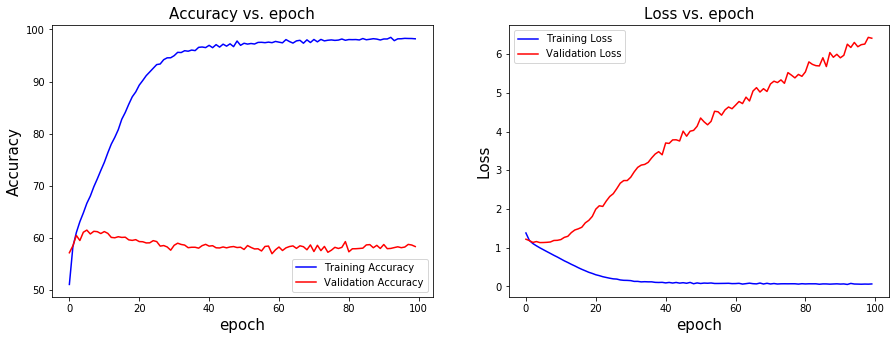

In [21]:
#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

#accuracy graph
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()
ax[0].plot(range(0,history_tl1.params['epochs']), [acc * 100 for acc in history_tl1.history['accuracy']], label='Training Accuracy', color='b')
ax[0].plot(range(0,history_tl1.params['epochs']), [acc * 100 for acc in history_tl1.history['val_accuracy']], label='Validation Accuracy', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,history_tl1.params['epochs']), history_tl1.history['loss'], label='Training Loss', color='b')
ax[1].plot(range(0,history_tl1.params['epochs']), history_tl1.history['val_loss'], label='Validation Loss', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

## Key Inferences

<p style="font-size:16px;font-family:Arial">1) The training accuracy is more than 96% and the validation accuracy is nearby 60%.<br><br>
    2) Because of the large gap between training and validation accuracy, we can infer that the model is overfitting.<br><br>
    3) We can prevent the model from overfitting and thereby increasing the validation accuracy by incorporating Image augmentation as shown below.</p>


In [22]:
#testing dataset feature extraction from the pre-trained layers
X_test_features = model_image(TL1_model, X_test_scaled)

#Evaluate the model
dh = display('',display_id=True)
dh.update(md("<br>Model evaluation is in progress..."))
t2 = time.time()

#model evaluation
test_loss = classifier_tl1.evaluate(X_test_features, y_test, verbose=0)
et = time.time()-t2
dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

#calculate the model evaluation parameters
f1  = f1_score(y_test, classifier_tl1.predict_classes(X_test_features), average='micro')
roc = roc_auc_score(y_test, classifier_tl1.predict_proba(X_test_features) , multi_class='ovr')

#create model evaluation dtaaframe
stats_tl1 = pd.DataFrame({'Test accuracy' : round(test_loss[1]*100,3),
                      'F1 score'      : round(f1,3),
                      'ROC AUC score' : round(roc,3),
                      'Total Loss'    : round(test_loss[0],3)}, index=[0])

#print the dataframe
display(stats_tl1)

<br>Model evaluation is completed! Total evaluation time: **0.696 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,58.13,0.581,0.903,6.506


## Model 2: Feature Extractor + Image Augmentation

<p style="font-size:16px;font-family:Arial"> We then proceed to fine-tune the layers added by us by freezing the layers of the pre-trained model and by using data augmentation. By freezing the layers of the pretrained models, the weights of those layers will not change and only the layers added by us will alter their weight and learn the features specific to our dataset. The augmentation of the images in our dataset enables us to train our layers with additional data to enhance the learning with respect to our dataset

In [23]:
#import required libraries
from keras.layers import InputLayer

#Model Initializing, Compiling and Fitting
classifier_feia = Sequential()

#fully connected layer
#input layer
classifier_feia.add(TL1_model)

#dense (hidden) layer
classifier_feia.add(Dense(units = 256, kernel_initializer='uniform', activation='relu', input_dim=TL1_model.output_shape[1]))

#dense (hidden) layer
classifier_feia.add(Dense(units = 512, kernel_initializer='uniform', activation='relu'))

#output layer
classifier_feia.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))

#compile the model
classifier_feia.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model summary
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
classifier_feia.summary()

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 512)               14714688  
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 14,982,730
Trainable params: 268,042
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
#include timing information
dh = display('',display_id=True)
dh.update(md("<br>Training is in progress....."))
t1 = time.time()

#model fitting
history_feia = classifier_feia.fit_generator(train_generator, 
                                             validation_data=val_generator, 
                                             epochs=100,
                                             steps_per_epoch=1000, 
                                             validation_steps=500, 
                                             verbose=0)  

tt = time.time()-t1
avg_per_epoch_feia = round(tt/(history_feia.epoch[-1]+1),3)
dh.update(md("<br>Training is completed! <br><br>Total training time: **{} seconds** <br>Average Training time per epoch: **{} seconds**".format(round(tt,3), avg_per_epoch_feia)))

<br>Training is completed! <br><br>Total training time: **8942.207 seconds** <br>Average Training time per epoch: **89.422 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

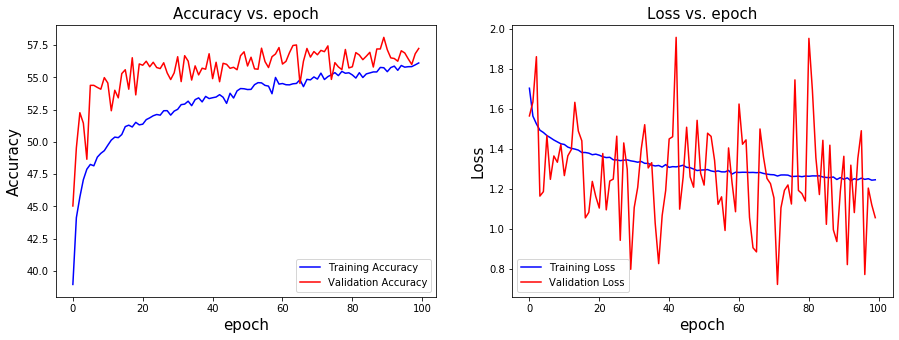

In [25]:
#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

#accuracy graph
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()
ax[0].plot(range(0,history_feia.params['epochs']), [acc * 100 for acc in history_feia.history['accuracy']], label='Training Accuracy', color='b')
ax[0].plot(range(0,history_feia.params['epochs']), [acc * 100 for acc in history_feia.history['val_accuracy']], label='Validation Accuracy', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,history_feia.params['epochs']), history_feia.history['loss'], label='Training Loss', color='b')
ax[1].plot(range(0,history_feia.params['epochs']), history_feia.history['val_loss'], label='Validation Loss', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

## Key Inferences

<p style="font-size:16px;font-family:Arial">1) The training accuracy is more than 55% and the validation accuracy is also nearby the training accuracy.<br><br>
    2) We have successfully mitigated overfitting in our model by introducing the Image Augmentation in the dataset.<br><br>
    3) The accuracy, however, is not as good as the previous model, to further boost the accuracy we need to fine-tune our model according to our dataset which is demonstrated below.</p>


In [26]:
#testing dataset feature extraction from the pre-trained layers
X_test_features = model_image(TL1_model, X_test_scaled)

#Evaluate the model
dh = display('',display_id=True)
dh.update(md("<br>Model evaluation is in progress..."))
t2 = time.time()

#model evaluation
test_loss = classifier_feia.evaluate(X_test_scaled, y_test, verbose=0)
et = time.time()-t2
dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

#calculate the model evaluation parameters
f1  = f1_score(y_test, classifier_feia.predict_classes(X_test_scaled), average='micro')
roc = roc_auc_score(y_test, classifier_feia.predict_proba(X_test_scaled) , multi_class='ovr')

#create model evaluation dtaaframe
stats_feia = pd.DataFrame({'Test accuracy' : round(test_loss[1]*100,3),
                      'F1 score'      : round(f1,3),
                      'ROC AUC score' : round(roc,3),
                      'Total Loss'    : round(test_loss[0],3)}, index=[0])

#print the dataframe
display(stats_feia)

<br>Model evaluation is completed! Total evaluation time: **20.234 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,56.84,0.568,0.914,1.256


## Model 3: Fine-tuning (whole network) + Image Augmentation

<p style="font-size:16px;font-family:Arial"> Finally, we proceed to fine-tune the entire model by unfreezing the layers of the pre-trained model training the entire model with the augmented dataset. By unfreezing the pretrained layers we make it possible for the pretrained layers to learn the features specifiic to our dataset by altering the weights of it's layers. Implementing data augmentatin just increases the size of the training dataset and enables the model to learn with a larger dataset. The motive of implementing fine-tuning is to permit a away for the model to learn the intricate details of the current data and not just rely on the dataset it was previously trained on.

In [27]:
#unfreeze all the layers of the model
TL1_model.trainable = True

#loop through all the layers of the model
for layer in TL1_model.layers:
    layer.trainable = True

#print layers details with trainable parameter set to True/False
layers = pd.DataFrame([(layer, layer.name, layer.trainable) for layer in TL1_model.layers], columns=['Layer Type', 'Layer Name', 'Trainable'])
layers

,Layer Type,Layer Name,Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_1,True
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,True
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,True
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,True
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,True
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,True
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,True
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,True
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,True
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,True


In [28]:
#import required library
from keras.layers import InputLayer

#Model Initializing, Compiling and Fitting
classifier_ftia = Sequential()

#fully connected layer
#input layer
classifier_ftia.add(TL1_model)

#dense (hidden) layer
classifier_ftia.add(Dense(units = 256, kernel_initializer='uniform', activation='relu', input_dim=TL1_model.output_shape[1]))

#dense (hidden) layer
classifier_ftia.add(Dense(units = 512, kernel_initializer='uniform', activation='relu'))

#output layer
classifier_ftia.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))

#compile the model
classifier_ftia.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model summary
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
classifier_ftia.summary()

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 512)               14714688  
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 14,982,730
Trainable params: 14,982,730
Non-trainable params: 0
_________________________________________________________________


In [29]:
#include timing information
dh = display('',display_id=True)
dh.update(md("<br>Training is in progress....."))
t1 = time.time()

#model fitting
history_ftia = classifier_ftia.fit_generator(train_generator, 
                                             steps_per_epoch=1000, 
                                             epochs=100,
                                             validation_data=val_generator, 
                                             validation_steps=500, 
                                             verbose=0)  
tt = time.time()-t1
avg_per_epoch_ftia = round(tt/(history_ftia.epoch[-1]+1),3)
dh.update(md("<br>Training is completed! <br><br>Total training time: **{} seconds** <br>Average Training time per epoch: **{} seconds**".format(round(tt,3), avg_per_epoch_ftia)))

<br>Training is completed! <br><br>Total training time: **39309.441 seconds** <br>Average Training time per epoch: **393.094 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

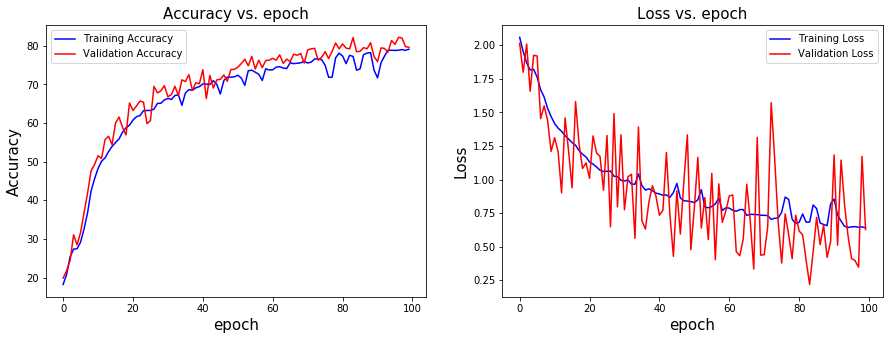

In [30]:
#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

#accuracy graph
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()
ax[0].plot(range(0,history_ftia.params['epochs']), [acc * 100 for acc in history_ftia.history['accuracy']], label='Training Accuracy', color='b')
ax[0].plot(range(0,history_ftia.params['epochs']), [acc * 100 for acc in history_ftia.history['val_accuracy']], label='Validation Accuracy', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,history_ftia.params['epochs']), history_ftia.history['loss'], label='Training Loss', color='b')
ax[1].plot(range(0,history_ftia.params['epochs']), history_ftia.history['val_loss'], label='Validation Loss', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

## Key Inferences

<p style="font-size:16px;font-family:Arial"> Out of all the model which we have discussed so far, the above model seems to be the best one because of the following:<br><br>
    1) The accuracy is approx 80% for both training and the validation dataset.<br><br>
    2) The model is generalizing well for the validation dataset, thereby preventing overfitting.<br><br>
    3) We can further increase the performance of the model by increasing the number of epochs as we can see the upward trend for both training as well as the validation dataset.<br><br>


In [31]:
#Evaluate the model
dh = display('',display_id=True)
dh.update(md("<br>Model evaluation is in progress..."))
t2 = time.time()

#model evaluation
test_loss = classifier_ftia.evaluate(X_test_scaled, y_test, verbose=0)
et = time.time()-t2
dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

#calculate the model evaluation parameters
f1  = f1_score(y_test, classifier_ftia.predict_classes(X_test_scaled), average='micro')
roc = roc_auc_score(y_test, classifier_ftia.predict_proba(X_test_scaled) , multi_class='ovr')

#create model evaluation dtaaframe
stats_ftia = pd.DataFrame({'Test accuracy' : round(test_loss[1]*100,3),
                      'F1 score'      : round(f1,3),
                      'ROC AUC score' : round(roc,3),
                      'Total Loss'    : round(test_loss[0],3)}, index=[0])

#print the dataframe
display(stats_ftia)

<br>Model evaluation is completed! Total evaluation time: **29.954 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,78.43,0.784,0.974,0.717


<H2>MobileNet</H2><br>
<p style="font-size:16px;font-family:Arial">The concept of MobileNet neural network architecture was proposed by a group of researchers at Google. The motive behind building MobileNet was to build lightweight deep neural networks by using depthwise seperable covolutions. MobileNet is a significantly lightweight model when compared to VGG-16 we have implemted above.<br><br> The MobileNet model is also trained on the ImageNet image classification dataset. The MobileNet model consists of 88  layers and works great with smaller datasets. One of the main adavnatages of using MobileNet is it's ability to reduce overfitting. 
<br><br>The model architecture of MobileNet is shown below.<br>

![alt text](Mobilenet.png "")
<center>Image Courtesy : <a href="https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299"> Transfer Learning using Mobilenet and Keras</a></center>
<br>

<p style="font-size:16px;font-family:Arial"> We have used the MobileNet model as the pretrained model in our neural network. The dimensions of the images in our dataset is 32X32 pixels with RGB color model.</p>

<p style="font-size:16px;font-family:Arial"> We then proceed to follow the same steps that we implemneted with the VGG-16 pretrained model.</p>


## Model 1: Feature Extraction

In [32]:
#import required libraries
from keras.applications.mobilenet import MobileNet

In [33]:
#create object of MobileNet class
TL2 = MobileNet(weights='imagenet', include_top = False, input_shape=(32, 32, 3))

C:\Users\prtk1\Anaconda3\envs\tf-gpu\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [34]:
#print layer details
TL2.layers

<p style="font-size:16px;font-family:Arial"> <b>We begin transfer learning process by removing the output classifier layer which has softmax implemented over 1000 units for the 1000 classes in the imagenet dataset used by MobileNet model to make the model consistent with our problem statement.</b></p>

In [35]:
#remove the last layer (Classifier) from the model
output = TL2.layers[-1].output
output = keras.layers.Flatten()(output)
TL2_model = Model(TL2.input, output)

<p style="font-size:16px;font-family:Arial"><b>We then proceed by freezing the layers of the MobileNet model, since we would like to take advantage of the generic image features that the MobileNet model has already learned and utilize the knowledge that the model has already learned to our benefit. By freezing the layers we prevent the weights of the layers of the pretrained model from being updated.<\b>

In [36]:
#set the traibable parameter to false for all the layer (freeze the model)
TL2_model.trainable = False
for layer in TL2_model.layers:
    layer.trainable = False

In [37]:
#layer and its trainable parameter details
TL2_details = pd.DataFrame([(layer, layer.name, layer.trainable) for layer in TL2_model.layers], columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 
TL2_details

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_3,False
1,<keras.layers.convolutional.ZeroPadding2D obje...,conv1_pad,False
2,<keras.layers.convolutional.Conv2D object at 0...,conv1,False
3,<keras.layers.normalization.BatchNormalization...,conv1_bn,False
4,<keras.layers.advanced_activations.ReLU object...,conv1_relu,False
...,...,...,...
83,<keras.layers.advanced_activations.ReLU object...,conv_dw_13_relu,False
84,<keras.layers.convolutional.Conv2D object at 0...,conv_pw_13,False
85,<keras.layers.normalization.BatchNormalization...,conv_pw_13_bn,False
86,<keras.layers.advanced_activations.ReLU object...,conv_pw_13_relu,False


<p style="font-size:16px;font-family:Arial"> <b> We now add fully connected classifier layers on top of the pretrained model to learn the features that are specific to our dataser. Since our dataset consists of 10 classes, our output layer consists of 10 units with the softmax activation function to give us the probability of each class with  respect to every input.</b>

In [39]:
#Model Initializing, Compiling and Fitting
classifier_TL2 = Sequential()

#fully connected layer
#input layer
classifier_TL2.add(InputLayer(input_shape=(TL2_model.output_shape[1],)))

#dense (hidden) layer
classifier_TL2.add(Dense(units = 256, kernel_initializer='uniform', activation='relu', input_dim=TL2_model.output_shape[1]))

#dense (hidden) layer
classifier_TL2.add(Dense(units = 512, kernel_initializer='uniform', activation='relu'))

#output layer
classifier_TL2.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))

#compile the model
classifier_TL2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model summary
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
classifier_TL2.summary()

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 399,114
Trainable params: 399,114
Non-trainable params: 0
_________________________________________________________________


<p style="font-size:16px;font-family:Arial"><b>We then extract the features, from the pre-trained layers that are frozen and use these extracted features to train the classifier layers that we've added on our model. We can visualize it by considering that the output from the layer before the flatten operation of the pretrained model now becomes the input to the new layers added by us on top of the pretrained model.</b>

In [40]:
#function to extract features from the images
def model_image(model, input_imgs):
    image_feature = model.predict(input_imgs, verbose=0)
    return image_feature

#training dataset feature extraction from the pre-trained layers
X_train_features = model_image(TL2_model, X_train_scaled)

#validation dataset feature extraction from the pre-trained layers
X_val_features   = model_image(TL2_model, X_val_scaled)

In [41]:
#dataset shape
print('Train Image shape:',      X_train_features.shape, 
      '\tValidation Image shape:', X_val_features.shape)

Train Image shape: (40000, 1024) 	Validation Image shape: (10000, 1024)


In [42]:
#include timing information
dh = display('',display_id=True)
dh.update(md("<br>Training is in progress....."))
t1 = time.time()

#model fitting
history_TL2 = classifier_TL2.fit(x=X_train_features, 
                    y=y_train,
                    validation_data=(X_val_features, y_val),
                    batch_size=30,
                    epochs=100,
                    verbose=0)

tt = time.time()-t1
avg_per_epoch_TL2 = round(tt/(history_TL2.epoch[-1]+1),3)
dh.update(md("<br>Training is completed! <br><br>Total training time: **{} seconds** <br>Average Training time per epoch: **{} seconds**".format(round(tt,3), avg_per_epoch_TL2)))


<br>Training is completed! <br><br>Total training time: **956.776 seconds** <br>Average Training time per epoch: **9.568 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

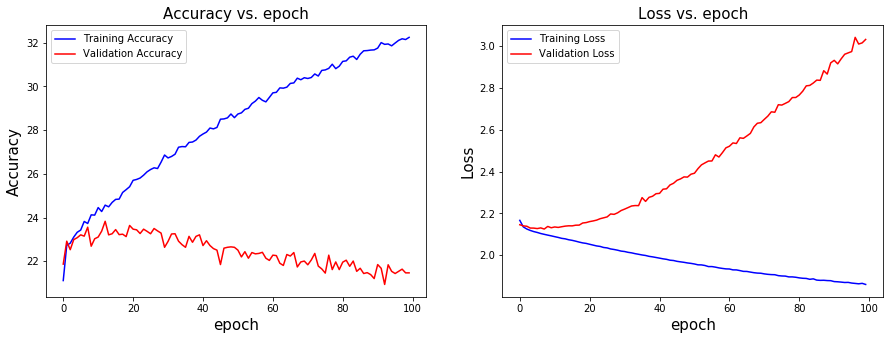

In [43]:
#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

#accuracy graph
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()
ax[0].plot(range(0,history_TL2.params['epochs']), [acc * 100 for acc in history_TL2.history['accuracy']], label='Training Accuracy', color='b')
ax[0].plot(range(0,history_TL2.params['epochs']), [acc * 100 for acc in history_TL2.history['val_accuracy']], label='Validation Accuracy', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,history_TL2.params['epochs']), history_TL2.history['loss'], label='Training Loss', color='b')
ax[1].plot(range(0,history_TL2.params['epochs']), history_TL2.history['val_loss'], label='Validation Loss', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

## Key Inferences

<p style="font-size:16px;font-family:Arial"> 1) The training accuracy is 32% and the validation accuracy is 22%.<br><br>
    2) As we can see the Model is not generalizing well after the first few epochs (5 to 7) for the validation dataset, hence overfitting occurred.<br><br>
    3) We can try increasing the dataset size using Image Augmentation to prevent overfitting which is demonstrated below.</p>


In [44]:
#testing dataset feature extraction from the pre-trained layers
X_test_features = model_image(TL2_model, X_test_scaled)

#Evaluate the model
dh = display('',display_id=True)
dh.update(md("<br>Model evaluation is in progress..."))
t2 = time.time()

#model evaluation
test_loss = classifier_TL2.evaluate(X_test_features, y_test, verbose=0)
et = time.time()-t2
dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

#calculate the model evaluation parameters
f1  = f1_score(y_test, classifier_TL2.predict_classes(X_test_features), average='micro')
roc = roc_auc_score(y_test, classifier_TL2.predict_proba(X_test_features) , multi_class='ovr')

#create model evaluation dtaaframe
stats_TL2 = pd.DataFrame({'Test accuracy' : round(test_loss[1]*100,3),
                      'F1 score'      : round(f1,3),
                      'ROC AUC score' : round(roc,3),
                      'Total Loss'    : round(test_loss[0],3)}, index=[0])

#print the dataframe
display(stats_TL2)

<br>Model evaluation is completed! Total evaluation time: **0.771 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,21.53,0.215,0.646,3.034


## Model 2: Feature Extraction + Image Augmentation

<p style="font-size:16px;font-family:Arial"> We then proceed to fine-tune the layers added by us by freezing the layers of the pre-trained model and by using data augmentation. By freezing the layers of the pretrained models, the weights of those layers will not change and only the layers added by us will alter their weight and learn the features specific to our dataset. The augmentation of the images in our dataset enables us to train our layers with additional data to enhance the learning with respect to our dataset

In [45]:
#Model Initializing, Compiling and Fitting
classifier_tl2_feia = Sequential()

#fully connected layer
#input layer
classifier_tl2_feia.add(TL2_model)

#dense (hidden) layer
classifier_tl2_feia.add(Dense(units = 256, kernel_initializer='uniform', activation='relu', input_dim=TL2_model.output_shape[1]))

#dense (hidden) layer
classifier_tl2_feia.add(Dense(units = 512, kernel_initializer='uniform', activation='relu'))

#output layer
classifier_tl2_feia.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))

#compile the model
classifier_tl2_feia.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model summary
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
classifier_tl2_feia.summary()

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 1024)              3228864   
_________________________________________________________________
dense_19 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 3,627,978
Trainable params: 399,114
Non-trainable params: 3,228,864
_________________________________________________________________


In [46]:
#include timing information
dh = display('',display_id=True)
dh.update(md("<br>Training is in progress....."))
t1 = time.time()

#model fitting
history_tl2_feia = classifier_tl2_feia.fit_generator(train_generator, 
                                             steps_per_epoch=1000, 
                                             epochs=100,
                                             validation_data=val_generator, 
                                             validation_steps=500, 
                                             verbose=0)  


tt = time.time()-t1
avg_per_epoch_tl2_feia = round(tt/(history_tl2_feia.epoch[-1]+1),3)
dh.update(md("<br>Training is completed! <br><br>Total training time: **{} seconds** <br>Average Training time per epoch: **{} seconds**".format(round(tt,3), avg_per_epoch_feia)))


<br>Training is completed! <br><br>Total training time: **4031.381 seconds** <br>Average Training time per epoch: **40.314 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

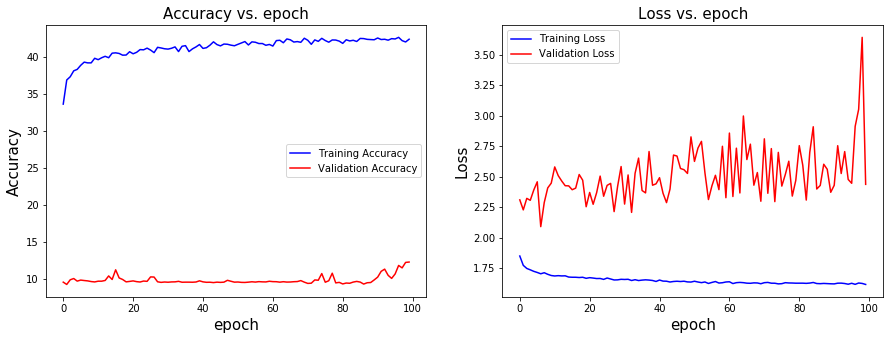

In [47]:
#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

#accuracy graph
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()
ax[0].plot(range(0,history_tl2_feia.params['epochs']), [acc * 100 for acc in history_tl2_feia.history['accuracy']], label='Training Accuracy', color='b')
ax[0].plot(range(0,history_tl2_feia.params['epochs']), [acc * 100 for acc in history_tl2_feia.history['val_accuracy']], label='Validation Accuracy', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,history_tl2_feia.params['epochs']), history_tl2_feia.history['loss'], label='Training Loss', color='b')
ax[1].plot(range(0,history_tl2_feia.params['epochs']), history_tl2_feia.history['val_loss'], label='Validation Loss', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

## Key Inferences

<p style="font-size:16px;font-family:Arial">    1) The training accuracy is more than 42% and the validation accuracy is nearby 10%.<br><br>
    2) In this case, Image Augmentation did not help much to prevent overfitting. Hence, we can try to fine-tune the model for the CIFAR-10 dataset which is demonstrated below.</p>


In [48]:
#Evaluate the model
dh = display('',display_id=True)
dh.update(md("<br>Model evaluation is in progress..."))
t2 = time.time()

#model evaluation
test_loss = classifier_tl2_feia.evaluate(X_test_scaled, y_test, verbose=0)
et = time.time()-t2
dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

#calculate the model evaluation parameters
f1  = f1_score(y_test, classifier_tl2_feia.predict_classes(X_test_scaled), average='micro')
roc = roc_auc_score(y_test, classifier_tl2_feia.predict_proba(X_test_scaled) , multi_class='ovr')

#create model evaluation dtaaframe
stats_tl2_feia = pd.DataFrame({'Test accuracy' : round(test_loss[1]*100,3),
                      'F1 score'      : round(f1,3),
                      'ROC AUC score' : round(roc,3),
                      'Total Loss'    : round(test_loss[0],3)}, index=[0])

#print the dataframe
display(stats_tl2_feia)

<br>Model evaluation is completed! Total evaluation time: **2.647 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,12.48,0.125,0.543,3.121


## Model 3: Fine-tuning (whole network) + Image Augmentation

<p style="font-size:16px;font-family:Arial"> Finally, we proceed to fine-tune the entire model by unfreezing the layers of the pre-trained model training the entire model with the augmented dataset. By unfreezing the pretrained layers we make it possible for the pretrained layers to learn the features specifiic to our dataset by altering the weights of it's layers. Implementing data augmentatin just increases the size of the training dataset and enables the model to learn with a larger dataset. The motive of implementing fine-tuning is to permit a away for the model to learn the intricate details of the current data and not just rely on the dataset it was previously trained on.

In [49]:
#unfreeze the model (set trainable parameter to True for all the layers)
TL2_model.trainable = True

#loop through all the layers of the model
for layer in TL2_model.layers:
    layer.trainable = True

#model layer and trainable parameter details
layers = pd.DataFrame([(layer, layer.name, layer.trainable) for layer in TL2_model.layers], columns=['Layer Type', 'Layer Name', 'Layer Trainable'])
layers

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_3,True
1,<keras.layers.convolutional.ZeroPadding2D obje...,conv1_pad,True
2,<keras.layers.convolutional.Conv2D object at 0...,conv1,True
3,<keras.layers.normalization.BatchNormalization...,conv1_bn,True
4,<keras.layers.advanced_activations.ReLU object...,conv1_relu,True
...,...,...,...
83,<keras.layers.advanced_activations.ReLU object...,conv_dw_13_relu,True
84,<keras.layers.convolutional.Conv2D object at 0...,conv_pw_13,True
85,<keras.layers.normalization.BatchNormalization...,conv_pw_13_bn,True
86,<keras.layers.advanced_activations.ReLU object...,conv_pw_13_relu,True


In [50]:
#Model Initializing, Compiling and Fitting
classifier_tl2_ftia = Sequential()

#fully connected layer
#input layer
classifier_tl2_ftia.add(TL2_model)

#dense (hidden) layer
classifier_tl2_ftia.add(Dense(units = 256, kernel_initializer='uniform', activation='relu', input_dim=TL2_model.output_shape[1]))

#dense (hidden) layer
classifier_tl2_ftia.add(Dense(units = 512, kernel_initializer='uniform', activation='relu'))

#output layer
classifier_tl2_ftia.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))

#compile the model
classifier_tl2_ftia.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model summary
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))
classifier_tl2_ftia.summary()

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*  Model  Summary  \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 1024)              3228864   
_________________________________________________________________
dense_22 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_23 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 3,627,978
Trainable params: 3,606,090
Non-trainable params: 21,888
_________________________________________________________________


In [51]:
#include timing information
dh = display('',display_id=True)
dh.update(md("<br>Training is in progress....."))
t1 = time.time()

#model fitting
history_tl2_ftia = classifier_tl2_ftia.fit_generator(train_generator, 
                                             steps_per_epoch=1000, 
                                             epochs=100,
                                             validation_data=val_generator, 
                                             validation_steps=500, 
                                             verbose=0) 

tt = time.time()-t1
avg_per_epoch_tl2_ftia = round(tt/(history_tl2_ftia.epoch[-1]+1),3)
dh.update(md("<br>Training is completed! <br><br>Total training time: **{} seconds** <br>Average Training time per epoch: **{} seconds**".format(round(tt,3), avg_per_epoch_ftia)))

<br>Training is completed! <br><br>Total training time: **4652.278 seconds** <br>Average Training time per epoch: **46.523 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>

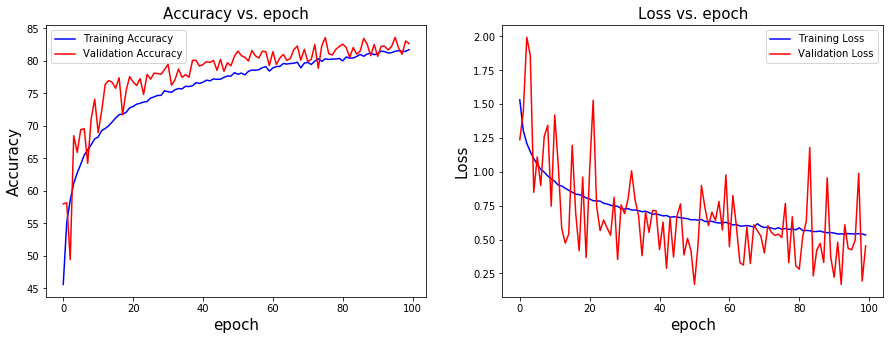

In [52]:
#plot the graph
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*     Training Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***<br>'))

#accuracy graph
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()
ax[0].plot(range(0,history_tl2_ftia.params['epochs']), [acc * 100 for acc in history_tl2_ftia.history['accuracy']], label='Training Accuracy', color='b')
ax[0].plot(range(0,history_tl2_ftia.params['epochs']), [acc * 100 for acc in history_tl2_ftia.history['val_accuracy']], label='Validation Accuracy', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,history_tl2_ftia.params['epochs']), history_tl2_ftia.history['loss'], label='Training Loss', color='b')
ax[1].plot(range(0,history_tl2_ftia.params['epochs']), history_tl2_ftia.history['val_loss'], label='Validation Loss', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

  ## Key Inferences

<p style="font-size:16px;font-family:Arial"> Out of all the model which we have discussed so far, the above model seems to perform the best because of the following:<br><br>
    1) The accuracy is approx 80% for both training and the validation dataset as the model layers learned the features of the CIFAR10 dataset, hence classified the images with considerable accuracy.<br><br>
    2) No overfitting occurred, hence the model generalized well for the validation dataset.<br><br>
    3) We can further increase the performance of the model by increasing the number of epochs as we can see the upward trend for both training as well as the validation dataset.<br><br></p>


In [53]:
#Evaluate the model
dh = display('',display_id=True)
dh.update(md("<br>Model evaluation is in progress..."))
t2 = time.time()

#model evaluation
test_loss = classifier_tl2_ftia.evaluate(X_test_scaled, y_test, verbose=0)
et = time.time()-t2
dh.update(md("<br>Model evaluation is completed! Total evaluation time: **{} seconds**".format(round(et,3))))
display(Markdown('<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***'))

#calculate the model evaluation parameters
f1  = f1_score(y_test, classifier_tl2_ftia.predict_classes(X_test_scaled), average='micro')
roc = roc_auc_score(y_test, classifier_tl2_ftia.predict_proba(X_test_scaled) , multi_class='ovr')

#create model evaluation dtaaframe
stats_tl2_ftia = pd.DataFrame({'Test accuracy' : round(test_loss[1]*100,3),
                      'F1 score'      : round(f1,3),
                      'ROC AUC score' : round(roc,3),
                      'Total Loss'    : round(test_loss[0],3)}, index=[0])

#print the dataframe
display(stats_tl2_ftia)

<br>Model evaluation is completed! Total evaluation time: **2.996 seconds**

<br>**\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*    Model Evaluation Summary    \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\***

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,82.2,0.822,0.984,0.52


# Comparison between both the model

## Accuracy Score

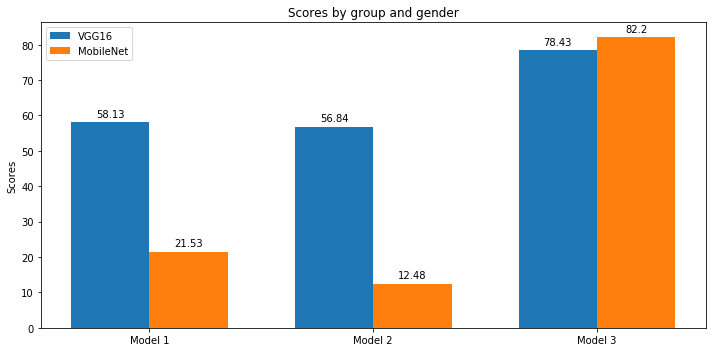

In [54]:
#plot details and values
labels = ['Model 1', 'Model 2', 'Model 3']
vgg16_values = [stats_tl1['Test accuracy'][0], stats_feia['Test accuracy'][0], stats_ftia['Test accuracy'][0]]
mNet_values = [stats_TL2['Test accuracy'][0], stats_tl2_feia['Test accuracy'][0], stats_tl2_ftia['Test accuracy'][0]]

#label location
x = np.arange(len(labels))

#width
width = 0.35
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, vgg16_values, width, label='VGG16')        #VGG16 model
rects2 = ax.bar(x + width/2, mNet_values, width, label='MobileNet')     #MobileNet model

ax.set_ylabel('Scores')                             #y-label
ax.set_title('Scores by group and gender')          #title
ax.set_xticks(x)                                    #x-ticks
ax.set_xticklabels(labels)                          #x-label
ax.legend()                                         #legend


#function to add label on each graph
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#call function
autolabel(rects1)
autolabel(rects2)

#set layout 
fig.tight_layout()

#plot the graph
plt.show()

where:<br>
* Model 1: Feature Extraction 
* Model 2: Feature Extraction + Image Augmentation
* Model 3: Fine-tuning (whole network) + Image Augmentation

From the above graph we can conclude the following: 

* Both VGG and MobileNet model were trained on the ImageNet dataset, however, the results show a huge discrepancy in the accuracy of the models when tested on the CIFAR-10 dataset. We believe that this discrepancy is caused because of the different model architectures which allows VGG16 model to learn the general features in the images from the ImageNet dataset and apply them to classify the the CIFAR-10 dataset better than MobileNet.<br>
* The absence of fine tuning in the first two models means that the classification task of CIFAR-10 dataset is completed by the models based on the knowledge learned from the ImageNet dataset.<br>
* In model 3, when we fine tune the models on the CIFAR-10 dataset, we observe that MobileNet achieves a higher accuracy score than VGG16 model. The reason can be attributed to fine-tuning the entire model which helped the model learn feaures and characteristics of the images specific to the CIFAR-10 dataset.

## Parameters

### Total Parameters
|Model|VGG16|MobileNet|
|-----|-----|---------|
|1|268,042|399,114|
|2|14,982,730|3,627,978|
|3|14,982,730|3,627,978|

<br><br>

### Trainable Parameters
|Model|VGG16|MobileNet|
|-----|-----|---------|
|1|268,042|399,114|
|2|268,042|399,114|
|3|14,982,730|3,606,090|

<br><br>

### Non-Trainable Parameters
|Model|VGG16|MobileNet|
|-----|-----|---------|
|1|0|0|
|2|14,714,688|3,228,864|
|3|0|21,888|

where:<br>
* Model 1: Feature Extraction 
* Model 2: Feature Extraction + Image Augmentation
* Model 3: Fine-tuning (whole network) + Image Augmentation
<br><br>

## Training Time per epoch

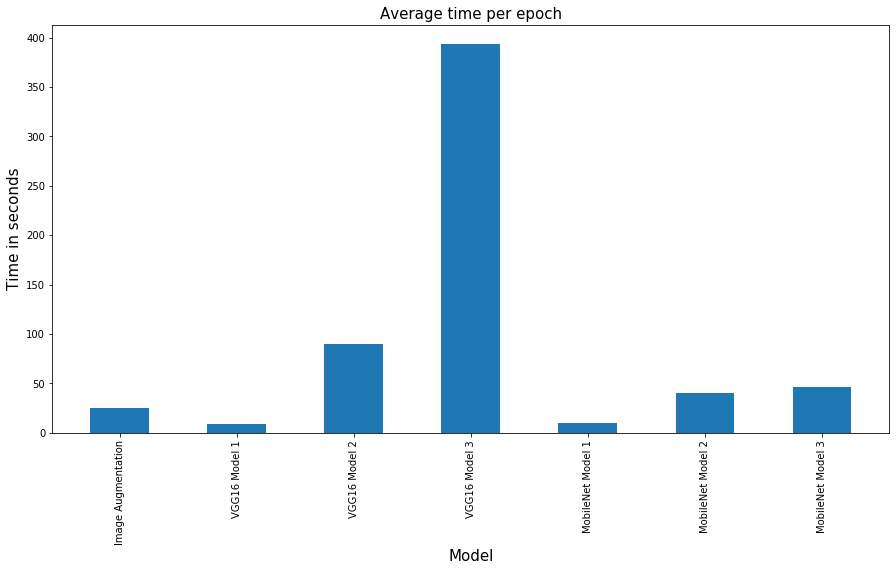

In [74]:
plt.figure(figsize=(15,7.5))
plt.bar(['Image Augmentation', 
          'VGG16 Model 1', 
          'VGG16 Model 2', 
          'VGG16 Model 3', 
          'MobileNet Model 1', 
          'MobileNet Model 2', 
          'MobileNet Model 3'],
         [avg_per_epoch_ia,
          avg_per_epoch_tl1,
          avg_per_epoch_feia,
          avg_per_epoch_ftia,
          avg_per_epoch_TL2,
          avg_per_epoch_tl2_feia,
          avg_per_epoch_tl2_ftia], width=0.5)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Time in seconds', fontsize=15)
plt.title('Average time per epoch', fontsize=15)
plt.xticks(rotation=90)
plt.show()

The average training time per epoch is the highest for VGG16 Model where we fine tune the whole network with the augmented dataset. The reason for this considerable increase in the training time per epoch is number of **trainable parameters** in VGG model 3 as compared to the other models. The number of trainable parameters in VGG16 model 3 are 300% more than the number of trainable parameters in MobileNet Model 3.

# Conclusion
<p style="font-size:16px;font-family:Arial"> In this project we have successfully demonstrated the use of a Convolutional Neural Network with the implementation of Transfer Learning and Image Augmentation for the purpose of classfication. We have shown and explained the results of these techniques by experimenting them with the CIFAR-10 dataset. After implemneting two pretrained models and image augmentation to this project we feel that our understanding of Convolutional Neural Networks has increased multifold along with understanding new and effecient ways to overcome the challenges in machine learning like lack of data, lack of compution resources and enhancing the model efficiency. </p>



<br>

# Areas of improvement

* <b>Dataset image size</b> -  Having images of higher resolution might result in the the model learning the features better and in turn having better classification accuracy. However, the complexity of the model will increase because of the added pixels. <br><br>
* <b>Optimizing Hyperparameters</b> - Hyperparameters like the number of epochs, optimizers, activation functions can be varied and compared to find the ideal model with the ideal hyperparameters.<br><br>
* <b>Add more Dense layers</b> - The layers of the CNN are responsible for learning the features in the neural network, adding the dense layers in the network will make sure that our model will learn the features of the multiple image classes in the dataset. Learning the features efficiently will also help the model to make better classification.<br><br>
* <b>Add Regularization parameter (Drop layers)</b> - We can also try and implement dropout technique which randomly drops a predefined number of units per epoch. Adding dropout may prevent the model from overfitting to the training dataset.<br><br>
* <b>Check other Transfer Network for better accuracy</b> - Some pre-trained models may work better than other models for the CIFAR-10 dataset. Exploring other pre-trained networks and their architecture might provide insightful outcomes. 


# Acknowledgment
<p style="font-size:16px;font-family:Arial">  We would like to express our gratitude to Dr. Timothy Havens, who helped us along the project with his insightful notes and lectures. We would also like to thank the TAs for their guidance in moments of difficulty. </p>

<br>

# References
* https://keras.io/applications/
* https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
* https://mtu.instructure.com/courses/1304186/files/84848981?module_item_id=15192963
* https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
* https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a
* https://mtu.instructure.com/courses/1304186/files/84790571?module_item_id=15186271